# Phik (φk) - get familiar with the latest correlation coefficient

## Setup

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

from pandas_profiling import ProfileReport

import phik
from phik.report import plot_correlation_matrix
from phik import report

## Data

In [2]:
cols_to_keep = ["english_name", "gen", "primary_type", "secondary_type",
                "hp", "attack", "defense", "sp_attack", 
                "sp_defense", "speed", "is_legendary", "is_sublegendary", "is_mythical"]
                
df = pd.read_csv("../data/pokemon.csv", encoding="utf-16-le", sep="\t")
df = df[cols_to_keep]
df = df.set_index("english_name")
df.head()

,gen,primary_type,secondary_type,hp,attack,defense,sp_attack,sp_defense,speed,is_legendary,is_sublegendary,is_mythical
english_name,,,,,,,,,,,,
Bulbasaur,I,grass,poison,45,49,49,65,65,45,0,0,0
Ivysaur,I,grass,poison,60,62,63,80,80,60,0,0,0
Venusaur,I,grass,poison,80,82,83,100,100,80,0,0,0
Charmander,I,fire,NaN,39,52,43,60,50,65,0,0,0
Charmeleon,I,fire,NaN,58,64,58,80,65,80,0,0,0


In [3]:
profile = ProfileReport(df, title="Pokemon Report")
profile.to_file("pokemon_report.html")

Export report to file: 100%|██████████| 1/1 [00:00<00:00, 163.16it/s]


## Phik

### Correlation matrix

In [4]:
phik_overview = df.phik_matrix()
phik_overview.round(2)

interval columns not set, guessing: ['hp', 'attack', 'defense', 'sp_attack', 'sp_defense', 'speed', 'is_legendary', 'is_sublegendary', 'is_mythical']


,gen,primary_type,secondary_type,hp,attack,defense,sp_attack,sp_defense,speed,is_legendary,is_sublegendary,is_mythical
gen,1.00,0.27,0.51,0.03,0.15,0.09,0.00,0.13,0.10,0.08,0.28,0.09
primary_type,0.27,1.00,0.62,0.11,0.30,0.29,0.35,0.25,0.26,0.30,0.11,0.12
secondary_type,0.51,0.62,1.00,0.11,0.25,0.39,0.28,0.20,0.29,0.00,0.17,0.11
hp,0.03,0.11,0.11,1.00,0.66,0.66,0.50,0.44,0.19,0.38,0.34,0.18
attack,0.15,0.30,0.25,0.66,1.00,0.60,0.53,0.28,0.28,0.39,0.24,0.22
defense,0.09,0.29,0.39,0.66,0.60,1.00,0.33,0.66,0.20,0.27,0.23,0.16
sp_attack,0.00,0.35,0.28,0.50,0.53,0.33,1.00,0.47,0.35,0.50,0.36,0.29
sp_defense,0.13,0.25,0.20,0.44,0.28,0.66,0.47,1.00,0.28,0.23,0.24,0.16
speed,0.10,0.26,0.29,0.19,0.28,0.20,0.35,0.28,1.00,0.21,0.25,0.19
is_legendary,0.08,0.30,0.00,0.38,0.39,0.27,0.50,0.23,0.21,1.00,0.00,0.00


In [5]:
interval_cols = ['hp', 'attack', 'defense', 'sp_attack', 'sp_defense', 'speed']
phik_overview = df.phik_matrix(interval_cols=interval_cols)
phik_overview

,gen,primary_type,secondary_type,hp,attack,defense,sp_attack,sp_defense,speed,is_legendary,is_sublegendary,is_mythical
gen,1.000000,0.272726,0.505442,0.033814,0.154335,0.094097,0.000000,0.129318,0.101911,0.077898,0.280369,0.091459
primary_type,0.272726,1.000000,0.615622,0.113320,0.304013,0.292604,0.347285,0.251910,0.262711,0.297484,0.108569,0.117164
secondary_type,0.505442,0.615622,1.000000,0.111118,0.250191,0.387183,0.281368,0.197364,0.287700,0.000000,0.165306,0.107653
hp,0.033814,0.113320,0.111118,1.000000,0.656955,0.659373,0.496676,0.439994,0.186801,0.376235,0.337391,0.184933
attack,0.154335,0.304013,0.250191,0.656955,1.000000,0.603576,0.530309,0.280304,0.277258,0.387124,0.237333,0.216558
defense,0.094097,0.292604,0.387183,0.659373,0.603576,1.000000,0.334843,0.655287,0.197077,0.267343,0.232854,0.158654
sp_attack,0.000000,0.347285,0.281368,0.496676,0.530309,0.334843,1.000000,0.469149,0.353237,0.495679,0.363241,0.291572
sp_defense,0.129318,0.251910,0.197364,0.439994,0.280304,0.655287,0.469149,1.000000,0.280307,0.234875,0.244718,0.163222
speed,0.101911,0.262711,0.287700,0.186801,0.277258,0.197077,0.353237,0.280307,1.000000,0.207774,0.254706,0.191633
is_legendary,0.077898,0.297484,0.000000,0.376235,0.387124,0.267343,0.495679,0.234875,0.207774,1.000000,0.000000,0.000000


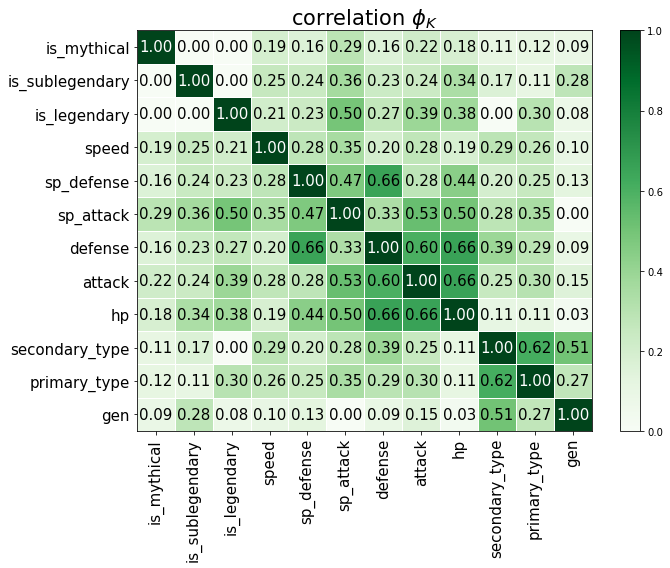

In [6]:
plot_correlation_matrix(phik_overview.values, 
                        x_labels=phik_overview.columns, 
                        y_labels=phik_overview.index, 
                        vmin=0, vmax=1, color_map="Greens", 
                        title=r"correlation $\phi_K$", 
                        fontsize_factor=1.5, 
                        figsize=(10, 8))
plt.tight_layout()

### Significance of the correlations

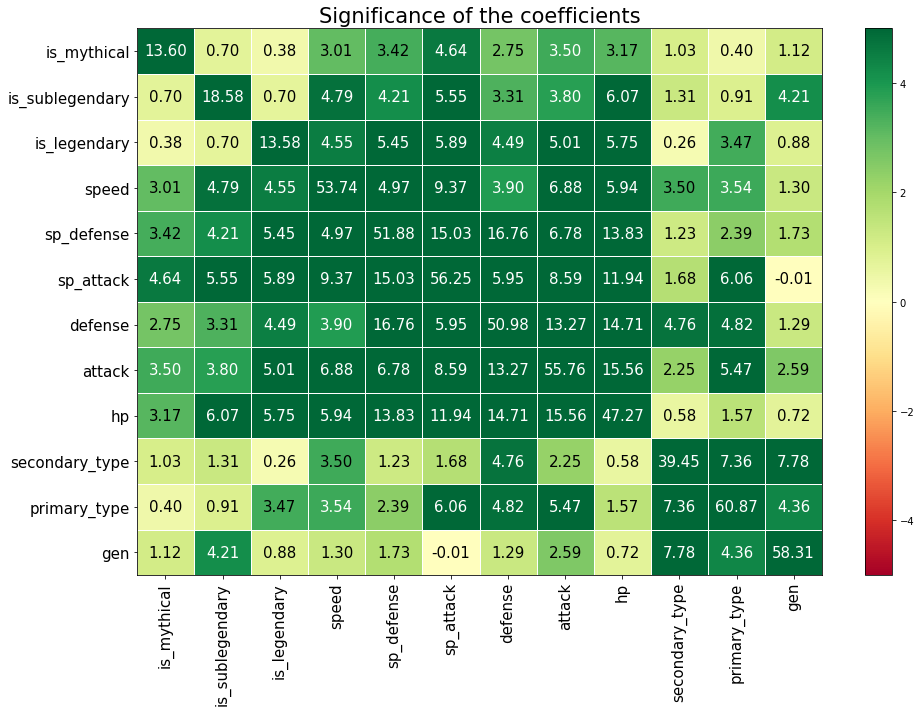

In [7]:
significance_overview = df.significance_matrix(interval_cols=interval_cols)
plot_correlation_matrix(significance_overview.fillna(0).values, 
                        x_labels=significance_overview.columns, 
                        y_labels=significance_overview.index, 
                        vmin=-5, vmax=5, title="Significance of the coefficients", 
                        usetex=False, fontsize_factor=1.5, figsize=(14, 10))
plt.tight_layout()

### Global correlation

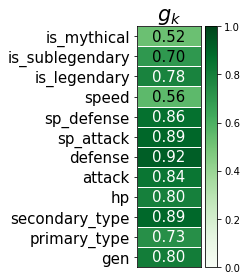

In [8]:
global_correlation, global_labels = df.global_phik(interval_cols=interval_cols)

plot_correlation_matrix(global_correlation, 
                        x_labels=[''], y_labels=global_labels, 
                        vmin=0, vmax=1, figsize=(3.5,4),
                        color_map="Greens", title=r"$g_k$",
                        fontsize_factor=1.5)
plt.tight_layout()

### Outlier significance

In [9]:
def round_list_of_tuples(list_of_tuples, decimals=2):
    """Rounds the numbers in a list of tuples"""
    new_list = []

    for tpl in list_of_tuples:
        new_tuple = (round(tpl[0], decimals), round(tpl[1], decimals))
        new_list.append(new_tuple)

    return new_list

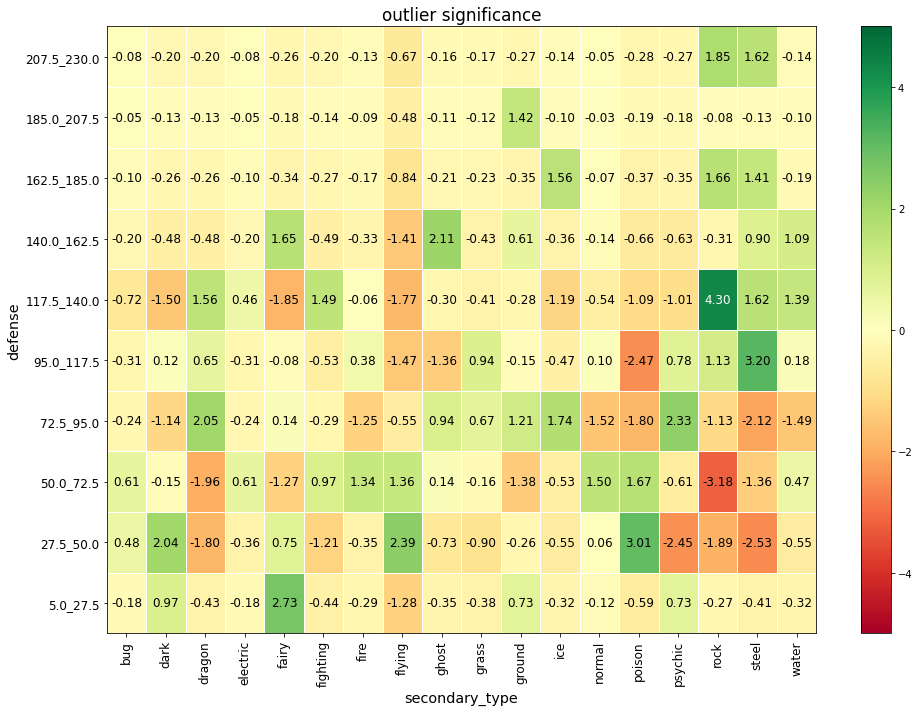

In [21]:
var_1 = "defense"
var_2 = "secondary_type"

tmp_interval_cols = ['defense']

outlier_signifs, binning_dict = df[[var_1, var_2]].outlier_significance_matrix(interval_cols=tmp_interval_cols, 
                                                                        retbins=True)

zvalues = outlier_signifs.values
xlabels = outlier_signifs.columns
ylabels = outlier_signifs.index

plot_correlation_matrix(zvalues, x_labels=xlabels, y_labels=ylabels, 
                        x_label=var_2,y_label=var_1,
                        vmin=-5, vmax=5, title='outlier significance',
                        identity_layout=False, fontsize_factor=1.2, 
                        figsize=(14, 10))

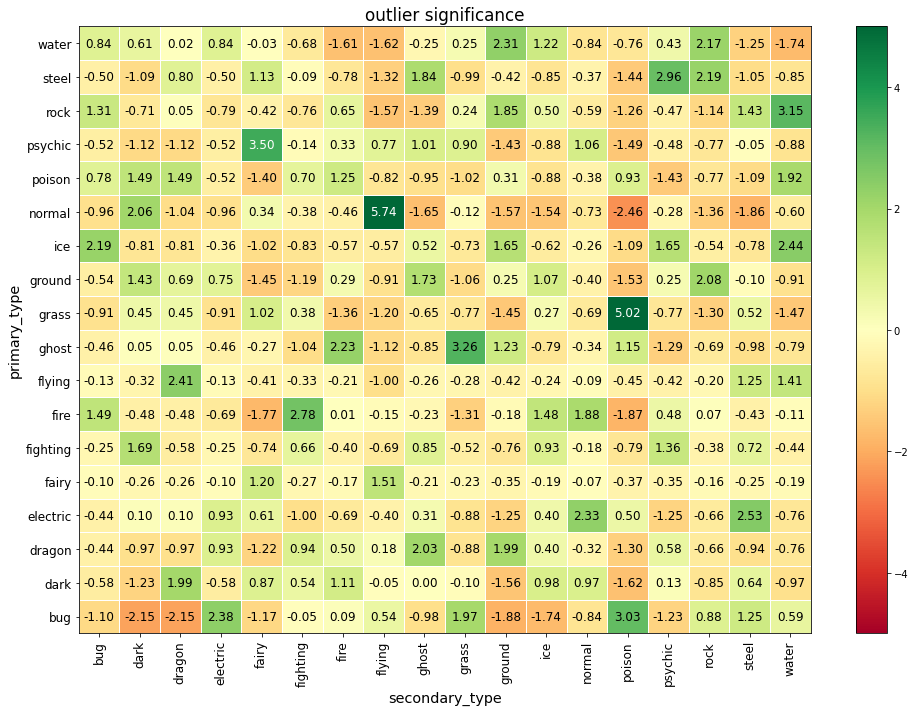

In [22]:
var_1 = "primary_type"
var_2 = "secondary_type"

outlier_signifs, binning_dict = df[[var_1,var_2]].outlier_significance_matrix(retbins=True)

zvalues = outlier_signifs.values
xlabels = binning_dict[var_2] if var_2 in binning_dict.keys() else outlier_signifs.columns
ylabels = binning_dict[var_1] if var_1 in binning_dict.keys() else outlier_signifs.index

plot_correlation_matrix(zvalues, x_labels=xlabels, y_labels=ylabels, 
                        x_label=var_2,y_label=var_1,
                        vmin=-5, vmax=5, title="outlier significance",
                        identity_layout=False, fontsize_factor=1.2, 
                        figsize=(14, 10))



### Correlation report

In [ ]:
rep = report.correlation_report(df, significance_threshold=3, correlation_threshold=0.5)